파이썬 머신러닝 완벽가이드 ch5. 1 ~ 5 (pg. 308~337)

#05. 회귀

05-01. 회귀 소개

05-02. 단순 선형 회귀를 통한 회귀 이해

05-03. 비용 최소화하기 - 경사 하강법(Gradient Descent) 소개

05-04. 사이킷런 LinearRegression을 이용한 보스턴 주택 가격 예측
- LinearRegression 클래스 - Ordinary Least Squares
- 회귀 평가 지표
- LinearRegression을 이용해 보스턴 주택 가격 회귀 구현

05-05. 다항회귀와 과(대)적합/과소적합 이해
- 다항 회귀 이해
- 다항 회귀를 이용한 과소적합 및 과적합 이해
- 편향-분산 트레이드오프(Bias-Variance Trade Off)

---


**05-01. 회귀 소개**

회귀란?

여러 개의 독리변수와 한 개의 종속변수 간의 상관관계를 모델링하는 기법. 지도학습의 두 가지 유형 중 하나 (예측 값이 연속형 숫자 값이라는 점이 차이점).
- 머신러닝 회귀 예측의 핵심은 주어진 피처와 결정 값 데이터 기반에서 학습을 통해 **최적의 회귀 계수**를 찾아내는 것.
- 데이터 값이 평균과 같은 일정한 값으로 돌아가려는 경향을 이용함.
- 유형 구분:

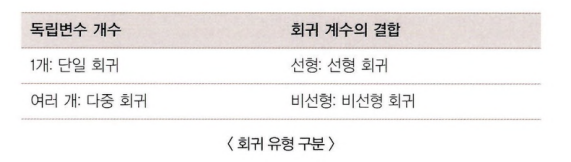

- 선형 회귀
   - 실제 값과 예측값의 차이(오류의 제곱 값, RSS)를 최소화하는 직선형 회귀선을 최적화하는 방식
   - 규제(Regularization, 일반적인 선형 회귀의 과적합 문제를 해결하기 위해서 회귀계수에 패널티를 적용하는 것) 방법에 따른 유형:
       - 일반 선형 회귀: 규제를 적용하지 않은 모델. 예측값과 실제 값의 RSS(Residual Sum of Squares)를 최소화할 수 있도록 회귀 계수를 최적화.
       - 릿지(Ridge): 선형 회귀에 L2 규제 추가. L2 규제는 상대적으로 큰 회귀 계수 값의 예측 영향도를 감소시키기 위해서 회귀 계수값을 더 작게 만드는 규제 모델.
       - 라쏘(Lasso): 선형 회귀에 L1 규제 추가. L1 규제는 예측 영향력이 작은 피처의 회귀 계수를 0으로 만들어 회귀 예측 시 피처가 선택되지 않게 하는 것, '피처 선택 기능'이라고도 불림.
       - 엘라스틱넷(ElasticNet): L2, L1 규제를 함께 결합한 모델. 주로 피처가 많은 데이터 세트에서 적용됨.
       - 로지스틱 회귀(Logistic Regression): 사실 분류에 사용되는 매우 강력한 분류 알고리즘. 이진 분류 뿐 아니라 희소 영역의 분류에서도 뛰어난 예측 성능을 보임.

**05-02. 단순 선형 회귀를 통한 회귀 이해**

단순 선형 회귀: 독립변수도 하나, 종속변수도 하나인 선형 회귀

- 회귀 모델: ^Y = w0 + w1*X
- 실제 데이터 값: 이러한 1차 함수 값에서 실제 값 만큼의 오류 값을 뺀(또는 더한) 값. w0 + w1*X + 오류 값.
- RSS: 오류 값의 제곱의 합. 비용(cost) 함수, 손실(loss) 함수라고도 불림. 이 비용 함수가 반환하는 값을 지속해서 감소시키다 더 이상 감소하지 않는 최소의 오류 값을 구해야 함. **회귀 계수인 w 변수가 중심 변수**임을 인지하는 것이 매우 중요!


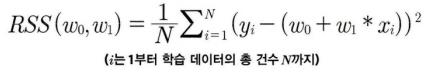

**05-03. 비용 최소화하기 - 경사 하강법(Gradient Descent) 소개**

경사 하강법: 최초 w에서부터 미분을 적용한 뒤 이 미분 값이 계속 감소하는 방향으로 순차적으로 w를 업데이트함. 마침내 더 이상 미분된 1차 함수의 기울기가 감소하지 않는 지점을 비용 함수가 최소인 지점으로 간주하고 그때의 w를 반환함.

-> 최솟값에 다다를수록 경사선의 기울기가 감소하고, 결국 평평해진다는 근거에 기반.



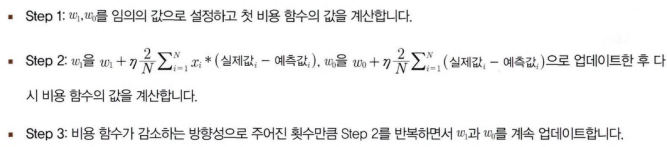

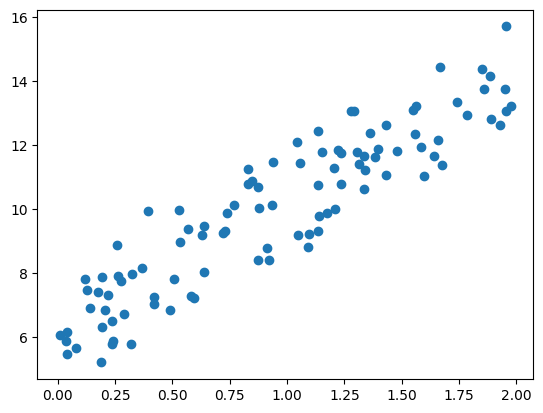

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(0)
# y = 4X + 6 을 근사(w1=4, w0=6). 임의의 값은 노이즈를 위해 만듦.
X = 2*np.random.rand(100, 1)  # np.random.rand(m,n) : 0부터 1사이의 균일 분포에서 난수 matrix array(mxn) 생성
y = 6 + 4*X + np.random.randn(100, 1) # np.random.randn(m,n) : 평균 0, 표준편차 1의 가우시안 표준정규분포 난수를 matrix array(mxn) 생성

# X, y 데이터 세트 산점도로 시각화
plt.scatter(X, y)
plt.show()

In [2]:
# 비용함수 정의
def get_cost(y, y_pred):
  N = len(y)
  cost = np.sum(np.square(y - y_pred))/N
  return cost

w1, w0값을 업데이트하는 get_weight_updates( ) 함수
- 100개의 데이터 X(1,2,..,100)이 있다면 예측값은 w0 + X(l)*w1 + X(2)*w1 +..+ X(100)*w1이며, 이는 입력 배열 X와 w1 배열의 내적과 동일함.

  따라서, y_pred = np.dot(X, w1.T) + w0로 예측 배열값을 계산함.

In [3]:
# w1과 w0을 업데이트할 w1_update, w0_update를 반환.
def get_weight_updates(w1, w0, X, y, learning_rate=0.01):
  N = len(y)
  # 먼저 w1_update, w0_update를 각각 w1, w0의 shape와 동일한 크기를 가진 0값으로 초기화
  w1_update = np.zeros_like(w1)
  w0_update = np.zeros_like(w0)
  # 예측 배열 계산하고 예측과 실제값의 차이 계산
  y_pred = np.dot(X, w1.T) + w0
  diff = y - y_pred

  # w0_update를 dot 행렬 연산으로 구하기 위해 모두 1값을 가진 행렬 생성
  w0_factors = np.ones((N, 1))
  # w1과 w0을 업데이트할 w1_update와 w0_update 계산
  w1_update = -(2/N)*learning_rate*(np.dot(X.T, diff))
  w0_update = -(2/N)*learning_rate*(np.dot(w0_factors.T, diff))

  return w1_update, w0_update

In [4]:
# 입력 인자 iters로 주어진 횟수만큼 반복적으로 w1와 w0에 업데이트를 적용함.
def gradient_descent_steps(X, y, iters=10000):
  # w0와 w1을 모두 0으로 초기화.
  w0 = np.zeros((1, 1))
  w1 = np.zeros((1, 1))

  # 인자로 주어진 iters만큼 반복적으로 get_weight_updates()를 호출해 w1, w0 업데이트 수행.
  for ind in range(iters):
    w1_update, w0_update = get_weight_updates(w1, w0, X, y, learning_rate=0.01)
    w1 = w1 - w1_update
    w0 = w0 - w0_update

  return w1, w0

In [5]:
def get_cost(y, y_pred) :
    N = len(y)
    cost = np.sum(np.square(y - y_pred)) / N
    return cost

w1, w0 = gradient_descent_steps(X, y, iters = 1000)
print('w1:{0:.3f} w0:{1:.3f}'.format(w1[0,0], w0[0,0]))
y_pred = w1[0,0] * X + w0
print('Gradient Descent Total Cost: {0:.4f}'.format(get_cost(y,y_pred)))

w1:4.022 w0:6.162
Gradient Descent Total Cost: 0.9935


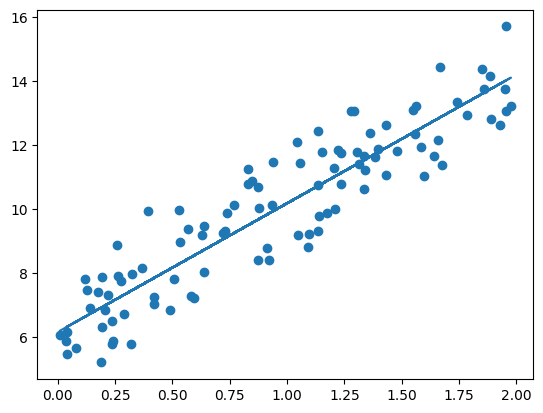

In [6]:
plt.scatter(X, y)
plt.plot(X, y_pred)
plt.show()

**확률적 경사 하강법 (Stochastic Gradient Descent)**

일부 데이터만 이용해 w가 업데이트되는 값을 계산하여 경사 하강법에 비해서 빠른 속도를 보장. 실전에서 대부분 사용됨. 미니 배치 확률적 경사 하강법이라고도 불림.

In [7]:
def stochastic_gradient_descent_steps(X, y, batch_size=10, iters=1000):
  w0 = np.zeros((1, 1))
  w1 = np.zeros((1, 1))

  for ind in range(iters):
    np.random.seed(ind)
    # 전체 X, y 데이터에서 랜덤하게 batch_size만큼 데이터를 추출해 sample_X, sample_y로 저장
    stochastic_random_index = np.random.permutation(X.shape[0])  # np.random.permutation(n) : 0부터 (n-1)까지의 정수를 무작위로 섞은 배열을 생성
    sample_X = X[stochastic_random_index[0:batch_size]]
    sample_y = y[stochastic_random_index[0:batch_size]]
    # 랜덤하게 batch_size만큼 추출된 데이터 기반으로 w1_update, w0_update 계산 후 업데이트
    w1_update, w0_update = get_weight_updates(w1, w0, sample_X, sample_y, learning_rate=0.01)
    w1 = w1 - w1_update
    w0 = w0 - w0_update

  return w1, w0

In [8]:
# (미니 배치) 확률적 경사 하강법으로 구한 w0, w1 결과는 경사하강법으로 구한 w1, w0와 큰 차이가 없고, 예측 오류 비용 또한 아주 조금 높을뿐, 큰 예측 성능상의 차이는 없음.
w1, w0 = stochastic_gradient_descent_steps(X, y, iters=1000)
print('w1:', round(w1[0,0], 3), 'w0:', round(w0[0,0], 3))
y_pred = w1[0,0]*X + w0[0,0]
print('Stochastic Gradient Descent Total Cost:', get_cost(y, y_pred))

w1: 4.028 w0: 6.156
Stochastic Gradient Descent Total Cost: 0.9937111256675345


**05-04. 사이킷런 LinearRegression을 이용한 보스턴 주택 가격 예측**
- LinearRegression 클래스

          class sklearn.linear_model.LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=1)

   - fit_intercept : 절편 값을 계산할 것인지 말지를 지정. False로 지정하면 intercept가 사용되지 않고 0으로 지정됨. 디폴트는 True.
   - normalize : True이면 회귀를 수행하기 전에 입력 데이터 세트를 정규화함. 디폴트는 False.
   - 속성: coef_, intercept_.

- Ordinary Least Squares 기반의 회귀 계수 계산은 입력 피처의 독립성에 많은 영향을 받음. 피처 간 상관관계가 매우 높아 분산이 커져서 오류에 민감해지는 **다중 공선성(multi-collinearity) 문제**가 나타나는 경우, 독립적인 주요 피처만 남기고 제거하는 규제를 적용하거나, 매우 많은 피처가 다중 공선성 문제를 가지고 있다면 PCA를 통해 차원 축소를 수행할 수 있음.


- 회귀 평가 지표


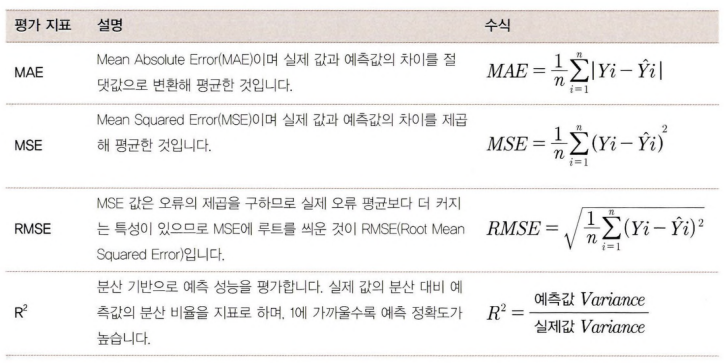

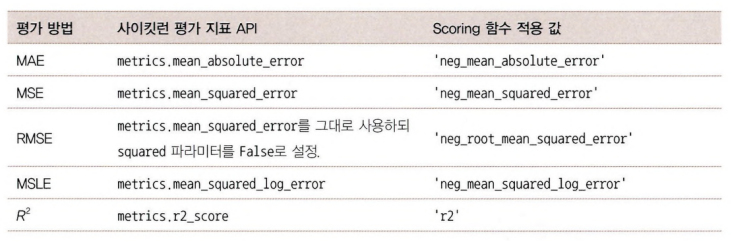

**LinearRegression을 이용해 보스턴 주택 가격 회귀 구현**

In [9]:
pip install scikit-learn==1.0.2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.5/26.5 MB 38.4 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.5.2
    Uninstalling scikit-learn-1.5.2:
      Successfully uninstalled scikit-learn-1.5.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 1.25.0 requires scikit-learn>=1.2.2, but you have scikit-learn 1.0.2 which is incompatible.


In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.datasets import load_boston
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# boston 데이터 세트 로드
boston = load_boston()

# boston 데이터 세트 DataFrame 변환
bostonDF = pd.DataFrame(boston.data, columns=boston.feature_names)

# boston 데이터 세트의 target 배열은 주택 가격임. 이를 PRICE 칼럼으로 DataFrame에 추가함.
bostonDF['PRICE'] = boston.target

print('Boston 데이터 세트 크기:', bostonDF.shape)
bostonDF.head()

Boston 데이터 세트 크기: (506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


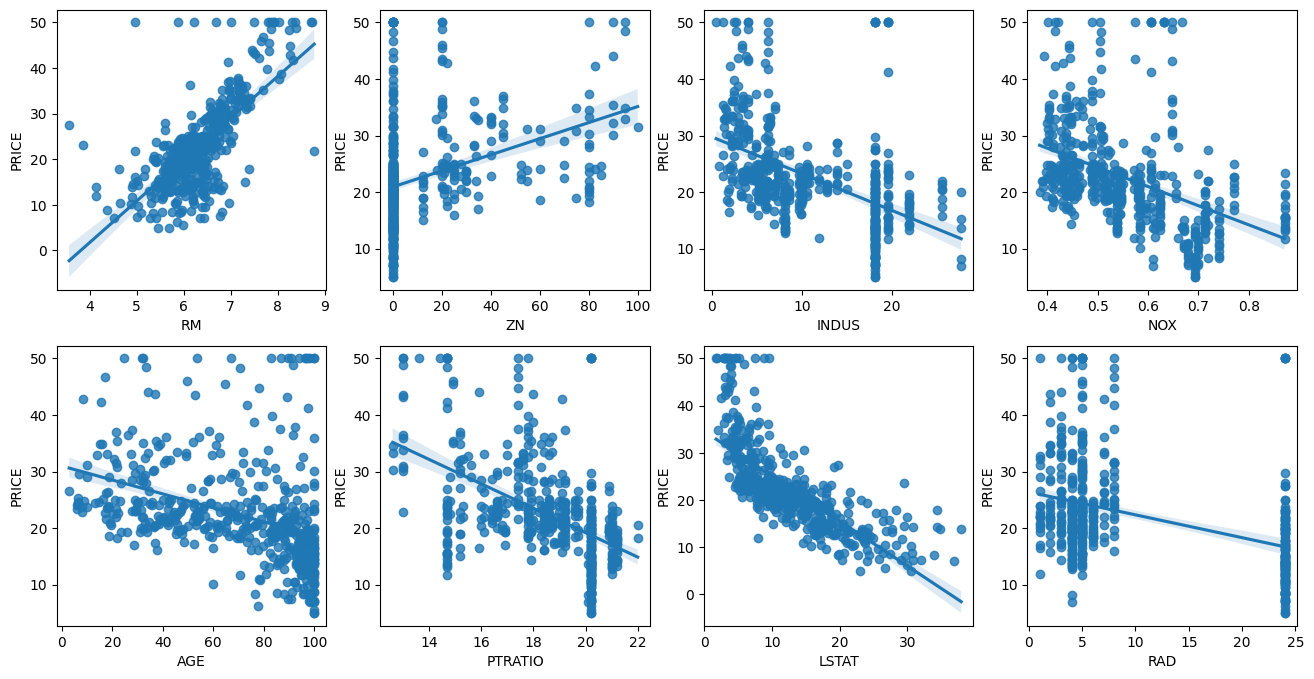

In [12]:
# 2개의 행과 4개의 열을 가진 subplots 이용. axs는 4x2개의 ax를 가짐.
fig, axs = plt.subplots(figsize=(16, 8), ncols=4, nrows=2)
lm_features = ['RM', 'ZN', 'INDUS', 'NOX', 'AGE', 'PTRATIO', 'LSTAT', 'RAD']
for i, feature in enumerate(lm_features):
  row = int(i/4)
  col = i%4
  # 시본(Seaborn)의 regplot()함수를 이용해 X, Y축 값의 산점도와 함께 선형 회귀 직선을 함께 표현
  sns.regplot(x=feature, y='PRICE', data=bostonDF, ax=axs[row][col])

RM, LSTAT의 PRICE 영향도가 가장 두드러지게 나타남. 기울기가 제일 극단적임.

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'], axis=1, inplace=False)

X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size=0.3, random_state=156)

# 선형 회귀 OLS로 학습/예측/평가 수행.
lr = LinearRegression()
lr.fit(X_train, y_train)
y_preds = lr.predict(X_test)

mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print('MSE: {0:.3f}, RMSE: {1:.3f}'.format(mse, rmse))
print('Variance score: {0:.3f}'.format(r2_score(y_test, y_preds)))

MSE: 17.297, RMSE: 4.159
Variance score: 0.757


In [14]:
print('절편 값:', lr.intercept_)
print('회귀 계수값:', np.round(lr.coef_, 1))

절편 값: 40.995595172164485
회귀 계수값: [ -0.1   0.1   0.    3.  -19.8   3.4   0.   -1.7   0.4  -0.   -0.9   0.
  -0.6]


In [15]:
# 회귀 계수를 큰 값 순으로 정렬하기 위해 Series로 생성. 인덱스 칼럼명에 유의.
coeff = pd.Series(data=np.round(lr.coef_, 1), index=X_data.columns)
coeff.sort_values(ascending=False)

,0
RM,3.4
CHAS,3.0
RAD,0.4
ZN,0.1
INDUS,0.0
AGE,0.0
TAX,-0.0
B,0.0
CRIM,-0.1
LSTAT,-0.6


5개의 폴드 세트에서 cross_val_score()을 이용해 교차검증으로 MSE, RMSE 추정하기
- 사이킷런의 metric 평가 기준(클수록 좋다)에 부합시키기 위해서 cross_val_score( )의 인자로 scoring='neg_mean_squared_error' 지정하여 호출하면 모델에서 계산된 MSE 값에 -1을 곱한 음수값을 반환함.

In [16]:
from sklearn.model_selection import cross_val_score

y_target = bostonDF['PRICE']
x_data = bostonDF.drop(['PRICE'], axis=1, inplace=False)
lr = LinearRegression()

# cross_val_score()로 5 폴드 세트로 MSE를 구한 후 이를 기반으로 다시 RMSE 구함.
neg_mse_scores = cross_val_score(lr, X_data, y_target, scoring='neg_mean_squared_error', cv=5)
rmse_scores = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

# cross_val_score(scoring='neg_mean_squared_error')로 반환된 값은 모두 음수
print('5 folds의 개별 Negative MSE scores:', np.round(neg_mse_scores, 2))
print('5 folds의 개별 RMSE scores:', np.round(rmse_scores, 2))
print('5 folds의 평균 RMSE:', avg_rmse)

5 folds의 개별 Negative MSE scores: [-12.46 -26.05 -33.07 -80.76 -33.31]
5 folds의 개별 RMSE scores: [3.53 5.1  5.75 8.99 5.77]
5 folds의 평균 RMSE: 5.828658946215812


**05-05. 다항회귀와 과(대)적합/과소적합 이해**
- 다항(Polynomial) 회귀 이해
   - 회귀가 독립변수의 단항식이 아닌 2차, 3차 방정식과 같은 다항식으로 표현되는 것
   - 다항 회귀는 여전히 선형 회귀임. 피처의 직선적 관계가 아닌 복잡한 다항 관계를 모델링할 수 있도록 하는 것.
   - 사이킷런은 다항회귀를 위한 클래스를 제공하지 않기 때문에, PolynomialFeatures 클래스를 통해 피처를 Polynomial 피처로 변환 후에 LinearRegression 클래스로 다항 회귀를 구현함.
        - from sklearn.preprocessing import PolynomialFeatures  

           

In [17]:
# 단항값 [x1, x2]를 2차 다항값 [1, x1, x2, x1^2, x1*x2, x2^2]로 변환하는 예제
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

# 다항식으로 변환한 단항식 생성, [[0,1], [2,3]]의 2x2 행령 생성
X = np.arange(4).reshape(2,2)
print('일차 단항식 계수 피처:\n', X)

# degree=2인 2차 다항식으로 변환하기 위해 PolynomialFeatures를 이용해 변환
poly = PolynomialFeatures(degree=2)
poly.fit(X)
poly_ftr = poly.transform(X)
print('변환된 2차 다항식 계수 피처:\n', poly_ftr)

일차 단항식 계수 피처:
 [[0 1]
 [2 3]]
변환된 2차 다항식 계수 피처:
 [[1. 0. 1. 0. 0. 1.]
 [1. 2. 3. 4. 6. 9.]]


첫번째 단항 계수 피처 [x1=0, x2=1]은 [1, x1=0, x2=1, x1^2=0, x1*x2=0, x2^2=1 형태인 [1,0,1,0,0,1]로
변환됨.

In [18]:
# 3차 다항회귀 결정 함수식을  y = 1 + 2*x1 + 3*x1^2 + 4*x2^3 으로 설정하고 회귀 계수 예측
def polynomial_func(X):
  y = 1 + 2*X[:, 0] + 3*X[:,0]**2 +4*X[:,1]**3
  return y

X = np.arange(4).reshape(2,2)
print('일차 단항식 계수 feature:\n', X)
y = polynomial_func(X)
print('삼차 다항식 결정값:\n', y)

일차 단항식 계수 feature:
 [[0 1]
 [2 3]]
삼차 다항식 결정값:
 [  5 125]


마찬가지로, 두번째 단항 계수 피처 [x1=2, x2=3]은 1 + 2x2 + 3x2^2 + 4x3^3 = 125로 변환됨.

In [20]:
# 3차 다항식 변환.
# 단항계수 피처 [x1, x2]를 3차 다항계수 [1, x1, x2, x1^2, x1*x2, x2^2, x1^3, x1^2*x2, x1*x2^2, x2^3]와 같이 10개의 다항 계수로 변환.
poly_ftr = PolynomialFeatures(degree=3).fit_transform(X)
print('3차 다항식 계수 feature: \n', poly_ftr)

# LinearRegression에 3차 다항식 계수 feature와 3차 다항식 결정값으로 학습 후 회귀 계수 확인
model = LinearRegression()
model.fit(poly_ftr, y)
print('Polynomial 회귀 계수:\n', np.round(model.coef_, 2))
print('Polynomial 회귀 shape:', model.coef_.shape)

3차 다항식 계수 feature: 
 [[ 1.  0.  1.  0.  0.  1.  0.  0.  0.  1.]
 [ 1.  2.  3.  4.  6.  9.  8. 12. 18. 27.]]
Polynomial 회귀 계수:
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]
Polynomial 회귀 shape: (10,)


10개의 회귀 계수  [0. 0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]가 도출됨.

원래 다항식 계수인 [1, 2, 0, 3, 0, 0, 0, 0, 0, 4]와는 차이가 있지만 다항 회귀로 근사하고 있음을 알 수 있다.

In [21]:
# 사이킷런의 Pipeline 객체를 이용해서 한번에 다항회귀를 구현
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import numpy as np

def polynomial_func(X):
  y = 1 + 2*X[:, 0] + 3*X[:,0]**2 +4*X[:,1]**3
  return y

# Pipeline 객체로 Streamline하게 Polynomial Feature 변환과 Linear Regression을 연결
model = Pipeline([('poly', PolynomialFeatures(degree=3)),
                  ('linear', LinearRegression())])
X = np.arange(4).reshape(2,2)
y = polynomial_func(X)

model = model.fit(X, y)

# 파이프라인의 'linear'단계에 있는 선형 모델의 가중치를 가져오기
print('Polynomial 회귀계수: \n', np.round(model.named_steps['linear'].coef_, 2))

Polynomial 회귀계수: 
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]


**다항 회귀를 이용한 과소적합 및 과적합 이해**
   - 다항회귀의 차수(degree)를 높일수록 학습 데이터에만 너무 맞춘 학습이 이루어져서 정작 테스트 데이터 환경에선 오히려 예측 정확도가 떨어지는 과적합의 문제가 크게 발생함.
   - 그렇다고 degree가 너무 낮으면 학습 데이터 패턴을 지나치게 단순화한 과소적합 모델이 될 수 있음.
   - 즉, 가장 좋은 예측 모델은 학습 데이터의 패턴을 잘 반영하면서도 복잡하지 않은 균형 잡힌(Balanced) 모델임.

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
%matplotlib inline

# 임의의 값으로 구성된 X값에 대해 코사인 변환 값을 반환.
def true_fun(X):
  return np.cos(1.5 * np.pi * X)

# X는 0부터 1까지 30개의 임의의 값을 순서대로 샘플링한 데이터.
np.random.seed(0)
n_samples = 30
X = np.sort(np.random.rand(n_samples))

# y값은 코사인 기반의 true_fun()에서 약간의 노이즈 변동 값을 더한 값.
y = true_fun(X) + np.random.randn(n_samples) * 0.1


 Degree 1 회귀 계수는 [-1.61]입니다.
Degree 1 MSE는 0.4077289625098685입니다.

 Degree 4 회귀 계수는 [  0.47 -17.79  23.59  -7.26]입니다.
Degree 4 MSE는 0.04320874987232064입니다.

 Degree 15 회귀 계수는 [-2.98293000e+03  1.03899390e+05 -1.87416123e+06  2.03716219e+07
 -1.44873283e+08  7.09315363e+08 -2.47065792e+09  6.24561050e+09
 -1.15676510e+10  1.56894936e+10 -1.54006023e+10  1.06457264e+10
 -4.91377530e+09  1.35919645e+09 -1.70380786e+08]입니다.
Degree 15 MSE는 181238256.56423894입니다.


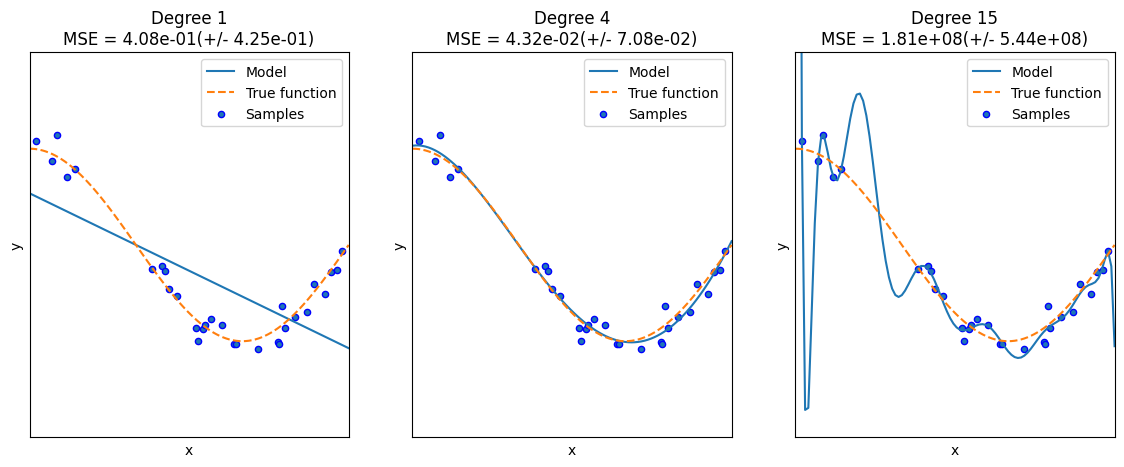

In [23]:
# 다항식 차수를 1, 4, 15별로 학습을 수행한 뒤, cross_val_score()로 MSE값을 구해 차수별 예측 성능을 평가.
plt.figure(figsize=(14, 5))
degrees = [1, 4, 15]

# 다항회귀의 차수를 1, 4, 15로 각각 변화시키면서 비교하기
for i in range(len(degrees)):
  ax = plt.subplot(1, len(degrees), i+1)
  plt.setp(ax, xticks=(), yticks=())

  # 개별 degree별로 Polynomial 변환하기
  polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
  linear_regression = LinearRegression()
  pipeline = Pipeline([('polynomial_features', polynomial_features),
                       ('linear_regression', linear_regression)])
  pipeline.fit(X.reshape(-1, 1), y)

  # 교차검증으로 다항회귀를 평가하기
  scores = cross_val_score(pipeline, X.reshape(-1,1), y, scoring='neg_mean_squared_error', cv=10)
  # Pipeline을 구성하는 세부 객체를 접근하는 named_steps['객체명']을 이용해 회귀계수 추출함.
  coefficients = pipeline.named_steps['linear_regression'].coef_
  print('\n Degree {0} 회귀 계수는 {1}입니다.'.format(degrees[i], np.round(coefficients, 2)))
  print('Degree {0} MSE는 {1}입니다.'.format(degrees[i], -1*np.mean(scores)))

  # 0부터 1까지 테스트 데이터 세트를 100개로 나누어 예측 수행하기
  # 테스트 데이터 세트에 회귀 예측을 수행하고 예측 곡선과 실제 곡선을 그려서 비교함.
  X_test = np.linspace(0, 1, 100)
  # 예측값 곡선
  plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label='Model')
  # 실제값 곡선
  plt.plot(X_test, true_fun(X_test), '--', label='True function')
  plt.scatter(X, y, edgecolor='b', s=20, label='Samples')
  plt.xlabel('x'); plt.ylabel('y'); plt.xlim((0,1));plt.ylim((-2, 2)); plt.legend(loc='best')
  plt.title('Degree {}\nMSE = {:.2e}(+/- {:.2e})'.format(degrees[i], -scores.mean(), scores.std()))

plt.show()

점선 곡선: 실제 데이터의 코사인 곡선

선 곡선: 예측 곡선
- Degree 1 예측곡선: 단순선형회귀와 같음. 단순 직선이 실제 데이터 세트인 코사인 데이터 세트를 예측하기엔 너무 단순한듯. 예측 곡선이 학습 데이터의 패턴을 제대로 반영하지 못하는 과소적합 모델이 됨.
- Degree 4 예측곡선: 변동하는 잡음까지는 예측하지 못했지만, 코사인 곡선 기반으로 테스트 데이터를 잘 예측한 곡선을 가진 모델이 됨. MSE값 0.04로 가장 뛰어난 예측성능을 가짐.
- Degeree 15 예측곡선: 변동 잡음값까지 지나치게 학습한 결과 예측 곡선이 학습 데이터만 정확히 예측하고, 테스트 값의 실제 곡선과는 완전히 다른 형태의 예측 곡선이 만들어짐. MSE값이 터무니없이 큰 오류값이 발생.

**편향-분산 트레이드오프(Bias-Variance Trade Off)**

일반적으로 편향이 높으면 분산은 낮아지고(과소적합), 반대로 분산이 높으면 편향이 낮아짐(과적합). 그렇기 때문에 **편향과 분산이 서로 트레이드오프를 이루면서 오류 Cost값이 최대로 낮아지는 모델을 구축하는 것**이 머신러닝이 극복해야할 가장 중요한 이슈!

- 고편향/저분산(High Bias/Low Variance)성을 가진 모델: 위의 Degree 1와 같은 모델. 매우 단순화되어 정확한 결과에서 벗어나면서도 예측이 특정 부분에 집중돼 있음. 과소적합되기 쉬움.
- 저편향/고분산(Low Bias/High Variance)성을 가진 모델: 위의 Degree 15와 같은 모델. 학습 데이터 하나 하나의 특성을 반영하면서 매우 복잡한 모델이 되어, 예측 결과가 실제 결과에 비교적 근접하지만 예측 결과가 실제 결과를 중심으로 꽤 넓은 부분에 분포됨. 과적합되기 쉬움.


아래는 편향과 분산에 따른 전체 오류값 곡선. 전체 오류가 가장 낮아지는 '골디락스' 지점에서 예측성능이 최대임.


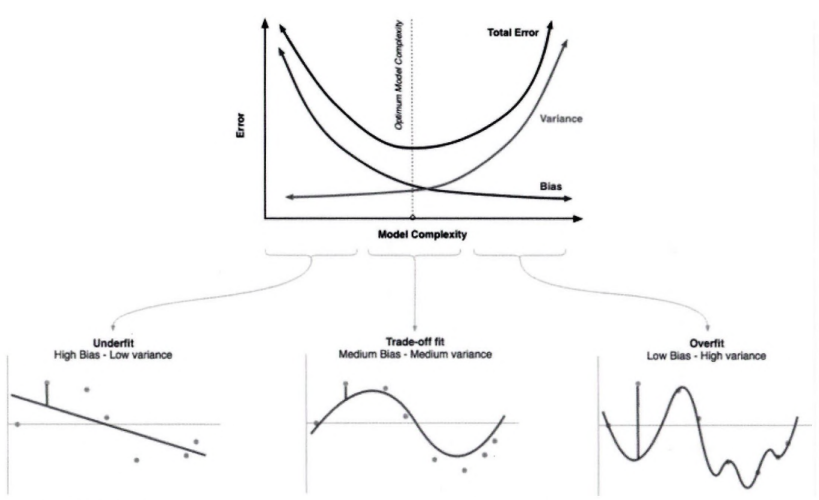